<a href="https://colab.research.google.com/github/Rigboone-68/Data-Science-DEP/blob/main/Heart_Disease_Prediction_Task5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load the datset zip file. The dataset is publically available on Kaggle.

In [3]:
# Unzip the dataset
!unzip Heart_Disease.zip

Archive:  Heart_Disease.zip
  inflating: dataset_heart.csv       


Import all the necessary libraries required for prediting heart disease.

In [4]:
# Installing necessary libraries
!pip install pandas matplotlib seaborn scikit-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Loading the dataset
data = pd.read_csv('dataset_heart.csv')

# Display the first few rows of the dataset
data.head()

# Check for missing values
print(data.isnull().sum())

# Handle missing values if necessary
# For simplicity, let's drop missing values (if any)
data.dropna(inplace=True)


age                                     0
sex                                     0
chest pain type                         0
resting blood pressure                  0
serum cholestoral                       0
fasting blood sugar                     0
resting electrocardiographic results    0
max heart rate                          0
exercise induced angina                 0
oldpeak                                 0
ST segment                              0
major vessels                           0
thal                                    0
heart disease                           0
dtype: int64


Visualize heart disease with features present in the dataset to get insight.

              age        sex   chest pain type  resting blood pressure  \
count  270.000000  270.000000       270.000000              270.000000   
mean    54.433333    0.677778         3.174074              131.344444   
std      9.109067    0.468195         0.950090               17.861608   
min     29.000000    0.000000         1.000000               94.000000   
25%     48.000000    0.000000         3.000000              120.000000   
50%     55.000000    1.000000         3.000000              130.000000   
75%     61.000000    1.000000         4.000000              140.000000   
max     77.000000    1.000000         4.000000              200.000000   

       serum cholestoral  fasting blood sugar  \
count         270.000000           270.000000   
mean          249.659259             0.148148   
std            51.686237             0.355906   
min           126.000000             0.000000   
25%           213.000000             0.000000   
50%           245.000000             0.

<ipython-input-6-74693ebaa07d>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['heart disease'], palette='Set2')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


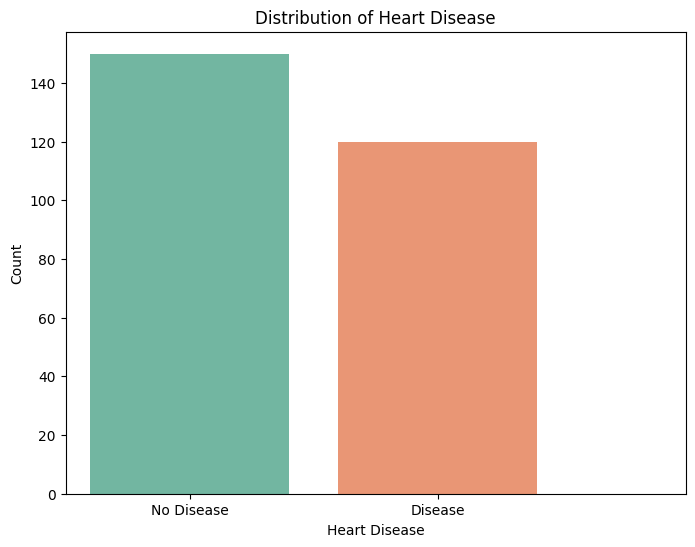

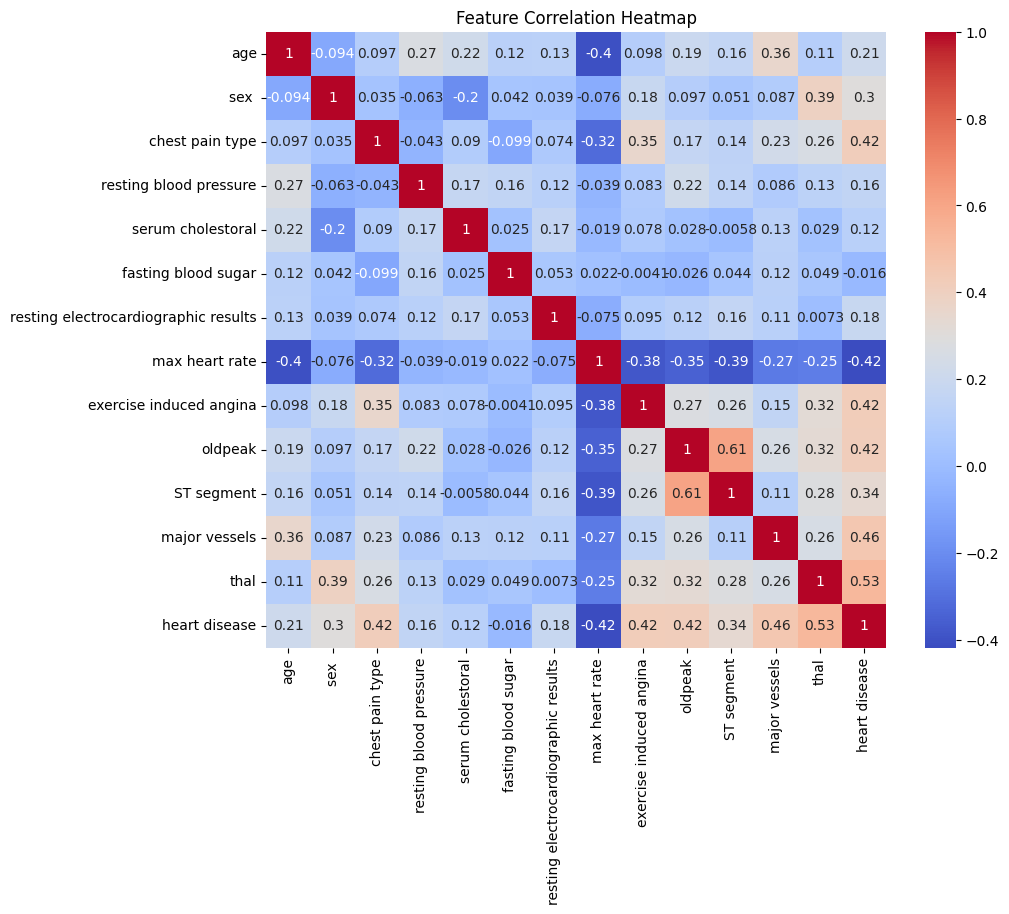

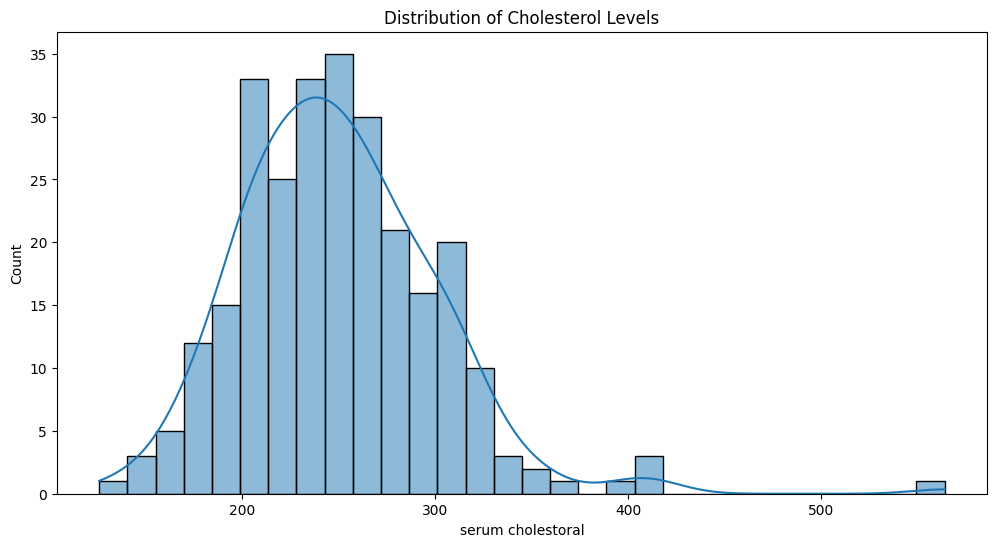

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


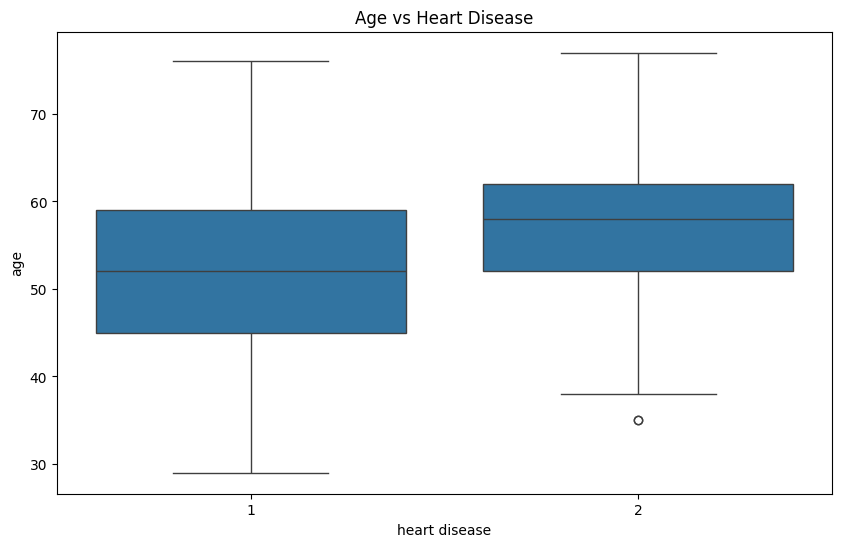

In [6]:
# Summary statistics
print(data.describe())

# Visualize the distribution of the target variable 'heart disease'
plt.figure(figsize=(8, 6))

# Plot the count of target variable classes
sns.countplot(x=data['heart disease'], palette='Set2')

# Increase the distance between x-ticks by setting axis limits and padding
plt.xlim(-0.5, 2)  # Adjust the limits to create more space around the x-axis
plt.xticks(ticks=[0, 1], labels=['No Disease', 'Disease'])  # Custom labels for better readability

# Add labels and title
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.title('Distribution of Heart Disease')

# Show the plot
plt.show()
# Correlation heatmap to identify relationships between features
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

# Visualizing key features (e.g., cholesterol, age, etc.)
plt.figure(figsize=(12,6))
sns.histplot(data['serum cholestoral'], kde=True, bins=30)
plt.title('Distribution of Cholesterol Levels')
plt.show()

# Box plot for Age vs Heart Disease
plt.figure(figsize=(10,6))
sns.boxplot(x='heart disease', y='age', data=data)
plt.title('Age vs Heart Disease')
plt.show()


Performing feature scaling and selection based on correlation and domain knowledge.

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

# Features to scale (All except the target variable 'heart disease')
X = data.drop(columns=['heart disease'])

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the data (scale features)
X_scaled = scaler.fit_transform(X)

# Convert scaled features back to a dataframe
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Display first few rows of scaled features
X_scaled.head()


,age,sex,chest pain type,resting blood pressure,serum cholestoral,fasting blood sugar,resting electrocardiographic results,max heart rate,exercise induced angina,oldpeak,ST segment,major vessels,thal
0,1.712094,0.689500,0.870928,-0.075410,1.402212,-0.417029,0.981664,-1.759208,-0.701222,1.181012,0.676419,2.472682,-0.875706
1,1.382140,-1.450327,-0.183559,-0.916759,6.093004,-0.417029,0.981664,0.446409,-0.701222,0.481153,0.676419,-0.711535,1.189277
2,0.282294,0.689500,-1.238045,-0.411950,0.219823,-0.417029,-1.026285,-0.375291,-0.701222,-0.656118,-0.954234,-0.711535,1.189277
3,1.052186,0.689500,0.870928,-0.187590,0.258589,-0.417029,-1.026285,-1.932198,1.426081,-0.743600,0.676419,0.349871,1.189277
4,2.152032,-1.450327,-1.238045,-0.636310,0.374890,-0.417029,0.981664,-1.240239,1.426081,-0.743600,-0.954234,0.349871,-0.875706


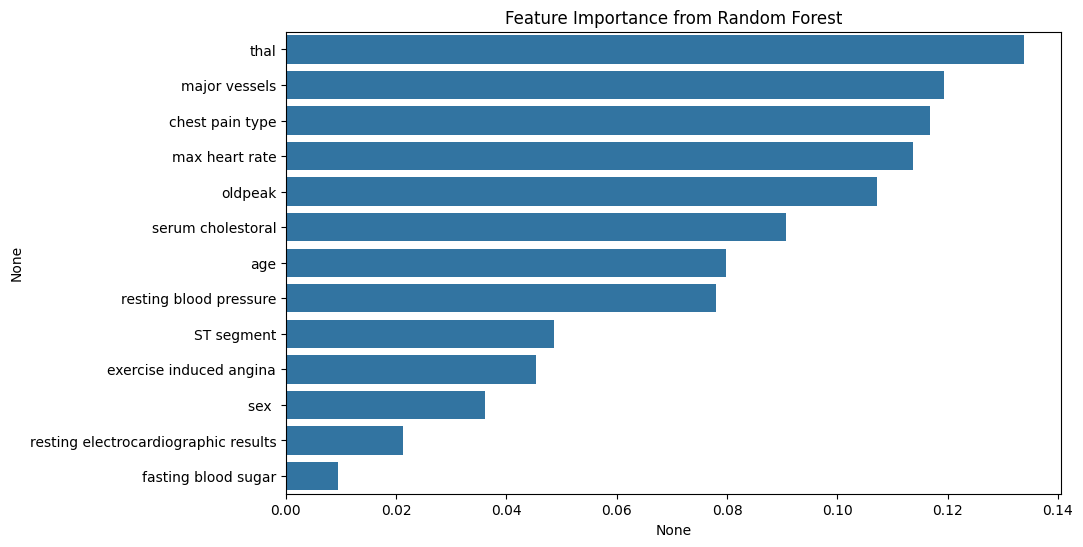

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(X_scaled, data['heart disease'])

# Get feature importance
feature_importance = pd.Series(rf.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=False, inplace=True)

# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.title('Feature Importance from Random Forest')
plt.show()




In [ ]:
# Feature scaling (important for algorithms like Logistic Regression)
scaler = StandardScaler()

# Select features (dropping irrelevant columns if any)
X = data.drop(columns=['heart disease'])
y = data['heart disease']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the scaler on the training data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Model Training.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# Training Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Training Decision Tree
tree = DecisionTreeClassifier(max_depth=4)
tree.fit(X_train, y_train)

# Evaluating Logistic Regression
y_pred_logreg = logreg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))
print(confusion_matrix(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))

# Evaluating Decision Tree
y_pred_tree = tree.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print(confusion_matrix(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))


Logistic Regression Accuracy: 0.8271604938271605
[[46  3]
 [11 21]]
              precision    recall  f1-score   support

           1       0.81      0.94      0.87        49
           2       0.88      0.66      0.75        32

    accuracy                           0.83        81
   macro avg       0.84      0.80      0.81        81
weighted avg       0.83      0.83      0.82        81

Decision Tree Accuracy: 0.7530864197530864
[[42  7]
 [13 19]]
              precision    recall  f1-score   support

           1       0.76      0.86      0.81        49
           2       0.73      0.59      0.66        32

    accuracy                           0.75        81
   macro avg       0.75      0.73      0.73        81
weighted avg       0.75      0.75      0.75        81



Model Evaluation and Tuning.

In [ ]:
# Cross-validation scores for Logistic Regression
logreg_cv_scores = cross_val_score(logreg, X, y, cv=10)
print("Logistic Regression CV Accuracy: {:.2f} ± {:.2f}".format(logreg_cv_scores.mean(), logreg_cv_scores.std()))

# Cross-validation scores for Decision Tree
tree_cv_scores = cross_val_score(tree, X, y, cv=10)
print("Decision Tree CV Accuracy: {:.2f} ± {:.2f}".format(tree_cv_scores.mean(), tree_cv_scores.std()))

# Hyperparameter tuning for Decision Tree
from sklearn.model_selection import GridSearchCV

params = {'max_depth': [3, 4, 5, 6], 'min_samples_split': [2, 5, 10]}
grid_search = GridSearchCV(tree, param_grid=params, cv=5)
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best parameters for Decision Tree:", grid_search.best_params_)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Logistic Regression CV Accuracy: 0.83 ± 0.06
Decision Tree CV Accuracy: 0.75 ± 0.08
Best parameters for Decision Tree: {'max_depth': 3, 'min_samples_split': 5}


Visualizing Model Performance.

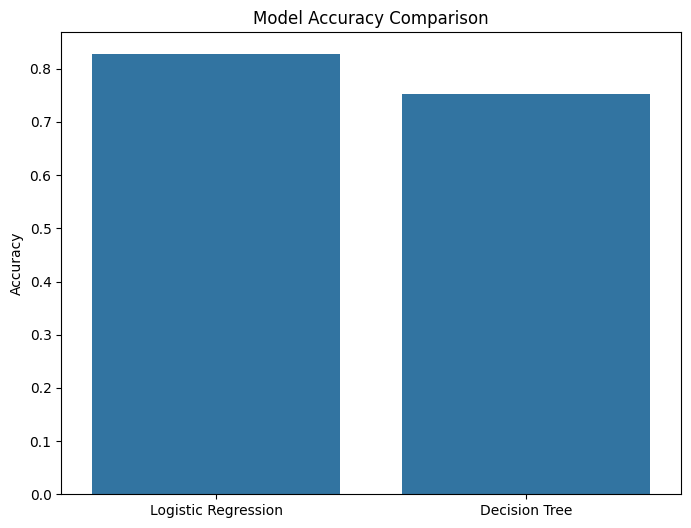

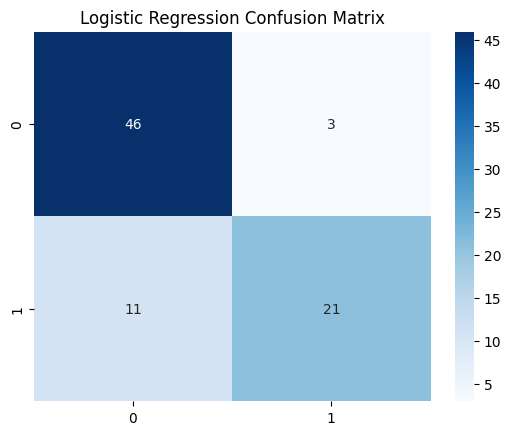

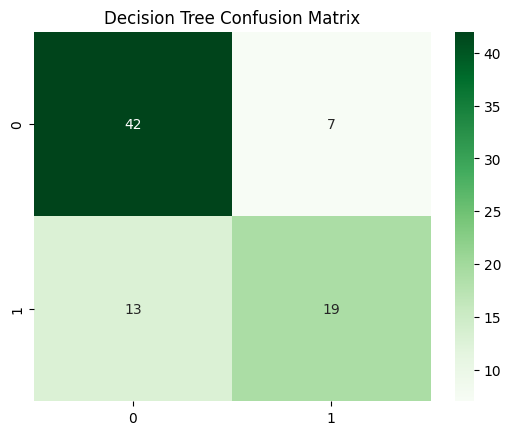

In [ ]:
# Comparing model accuracy
models = ['Logistic Regression', 'Decision Tree']
accuracies = [accuracy_score(y_test, y_pred_logreg), accuracy_score(y_test, y_pred_tree)]

plt.figure(figsize=(8,6))
sns.barplot(x=models, y=accuracies)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()

# Confusion Matrix Heatmap for Logistic Regression
sns.heatmap(confusion_matrix(y_test, y_pred_logreg), annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

# Confusion Matrix Heatmap for Decision Tree
sns.heatmap(confusion_matrix(y_test, y_pred_tree), annot=True, fmt='d', cmap='Greens')
plt.title('Decision Tree Confusion Matrix')
plt.show()


Practical Implementation for Healthcare:

We can simulate practical usage, such as predicting heart disease risk for new patient data.

In [ ]:
# New patient data for prediction
new_patient1 = np.array([[1.875645,	0.234500,	0.846332,	-0.072213,
                         2.453626,	-0.412323,	0.981664,	-1.745569,
                         -0.453626,	1.854783,	0.908764, 2.472682,	-0.875706]])
new_patient2 = np.array([[1.875645,	0.234500,	0.654345,	-0.072213,
                         2.453626,	-0.434221,	0.123432,	-1.21213,
                         -0.453626,	1.854783,	0.908764, 1.465734,	-0.000000]])
new_patient_scaled1 = scaler.transform(new_patient1)
new_patient_scaled2 = scaler.transform(new_patient2)

# Predict heart disease risk
prediction1 = logreg.predict(new_patient_scaled1)
prediction2 = logreg.predict(new_patient_scaled2)
print("Heart Disease Prediction (1 = Disease, 0 = No Disease):", prediction1[0])
print("Heart Disease Prediction (1 = Disease, 0 = No Disease):", prediction2[0])

Heart Disease Prediction (1 = Disease, 0 = No Disease): 1
Heart Disease Prediction (1 = Disease, 0 = No Disease): 1


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
